### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis
from tabulate import tabulate  
from scipy import stats  

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

### Data Cleaning

##### Displaying the first five rows of dataset

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Checking type of data and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##### Visualization for Null values

In [7]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

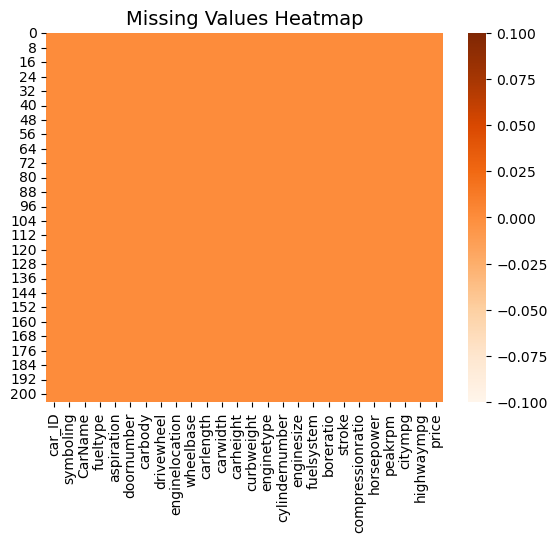

In [8]:
sns.heatmap(df.isnull(), cmap="Oranges")
plt.title('Missing Values Heatmap', fontsize=14)
plt.show()

- Our dataset is completely clean and doesn't contain any Null Values

##### Checking the number of rows and columns 

In [9]:
df.shape

(205, 26)

- The dataset has 205 rows and 26 columns

##### Displaying the names of the columns

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##### Describing the dataset

In [11]:
# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.expand_frame_repr', False)  # Prevent the DataFrame from being wrapped into multiple lines

In [12]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


### Exploratory Data Analysis

##### Checking for duplicates

In [13]:
# checking if there are duplicated rows using the df.duplicated() function

df[df.duplicated(keep = 'first')]       # keep = 'first' does not mark the first occurrence as duplicate

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There are no duplicates.

##### Pie Charts

In [14]:
def plot_categorical_pie_charts(df, categorical_cols, cols_per_row=2, font_scale=1.8, start_angle=0, rotate=0, font_size=18, font_weight='bold'):
    """
    Plot categorical columns as pie charts with specified layout and text sizes.
    
    Parameters:
        df (DataFrame): The DataFrame containing the necessary data.
        categorical_cols (list): List of categorical columns to plot.
        cols_per_row (int): Number of columns per row in the subplot grid (default: 2).
        font_scale (float): Font scale factor for overall text elements (default: 1.8).
    """
    # Calculate the number of rows needed based on the number of categorical columns and columns per row
    num_rows = (len(categorical_cols) + cols_per_row - 1) // cols_per_row
    
    # Set the font scale for overall text elements
    sns.set_context('talk', font_scale=font_scale)  # Adjust the font scale for larger text
    
    # Create subplots with the specified layout
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, num_rows * 6))  # Increase height for larger text
    
    # Flatten axes array to handle both 1-row and multi-row layouts
    axes = axes.flatten()
    
    # Plot each categorical column as a pie chart
    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        
        # Plot pie chart with increased text size
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=start_angle, ax=ax, rotatelabels=True,
                                    textprops={'fontsize': font_size, 'fontweight': font_weight, 'rotation': rotate})  # Increase font size
        
        # Remove y-axis label
        ax.set_ylabel('')
        
        # Add legend with category labels (bold) and increased font size
        legend = ax.legend(df[col].value_counts().index, title=col, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(legend.get_title(), fontweight='bold', fontsize=20)  # Increase legend title font size
    
        # Set legend item font size
        for item in legend.texts:
            item.set_fontsize(font_size)  # Increase legend item font size
    
    # Hide empty subplots if there are fewer categorical columns than expected
    for j in range(len(categorical_cols), num_rows * cols_per_row):
        axes[j].axis('off')
    
    # Adjust layout spacing
    plt.tight_layout()
    
    # Save the plot as an image
    plt.savefig('c10.png', dpi=300)

    # Display the plot
    plt.show()

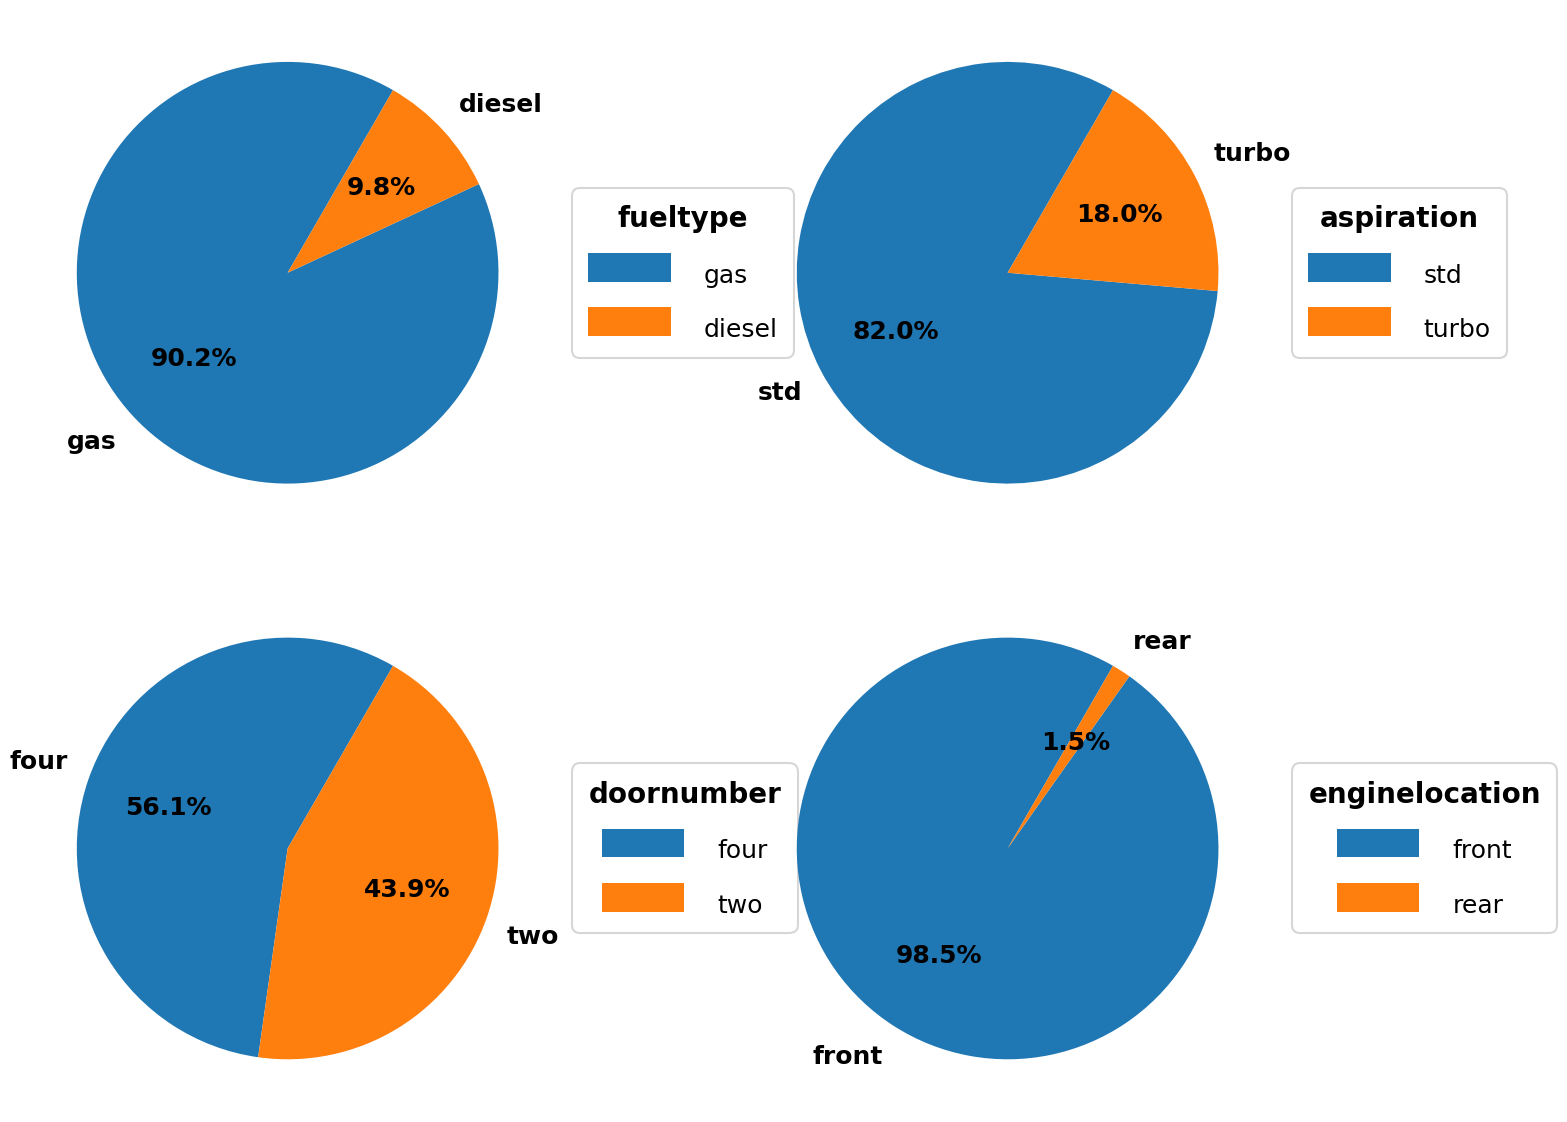

In [15]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
plot_categorical_pie_charts(df, categorical_cols, cols_per_row=2, font_scale=1.8, start_angle=60, rotate=0, font_size=18, font_weight='bold')

##### Encoding columns

In [16]:
# Applying label encoding to each column in the list
to_encode = ['fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem']

for column in to_encode:
    df[column] = LabelEncoder().fit_transform(df[column])
    
# Print the dataset to check the changes
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


##### Describing the data again

In [17]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,3.014634,2.117073,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.054765,0.795792,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.000000,2.000000,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.000000,2.000000,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.000000,2.000000,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

##### Relationship/Correlation of columns with each other

In [19]:
def plot_correlation_heatmap(dataframe, figsize=(20, 8), save_filename=None, dpi=300):
    """
    Plot a correlation heatmap for the given DataFrame.

    Parameters:
    - dataframe: The DataFrame containing the data for which correlation needs to be calculated and plotted.
    - figsize: Tuple (width, height) specifying the figure size (default: (20, 8)).
    - save_filename: Optional filename to save the plot as an image file (default: None).
    - dpi: Dots per inch (resolution) for the saved image file (default: 300).

    Returns:
    - None
    """
    # Calculate correlation matrix using corr()
    corr_matrix = dataframe.corr()

    # Create a mask to hide the upper triangle for redundancy
    mask = np.triu(corr_matrix)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Oranges", mask=mask, annot_kws={"fontsize": 13})
    
    # Set plot title
    plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
    # Customize tick labels for x-axis and y-axis
    plt.xticks(fontsize=15)  # Set smaller font size for x-axis tick labels
    plt.yticks(fontsize=15)  # Set smaller font size for y-axis tick labels
    plt.savefig(save_filename, dpi=dpi)
    plt.show()

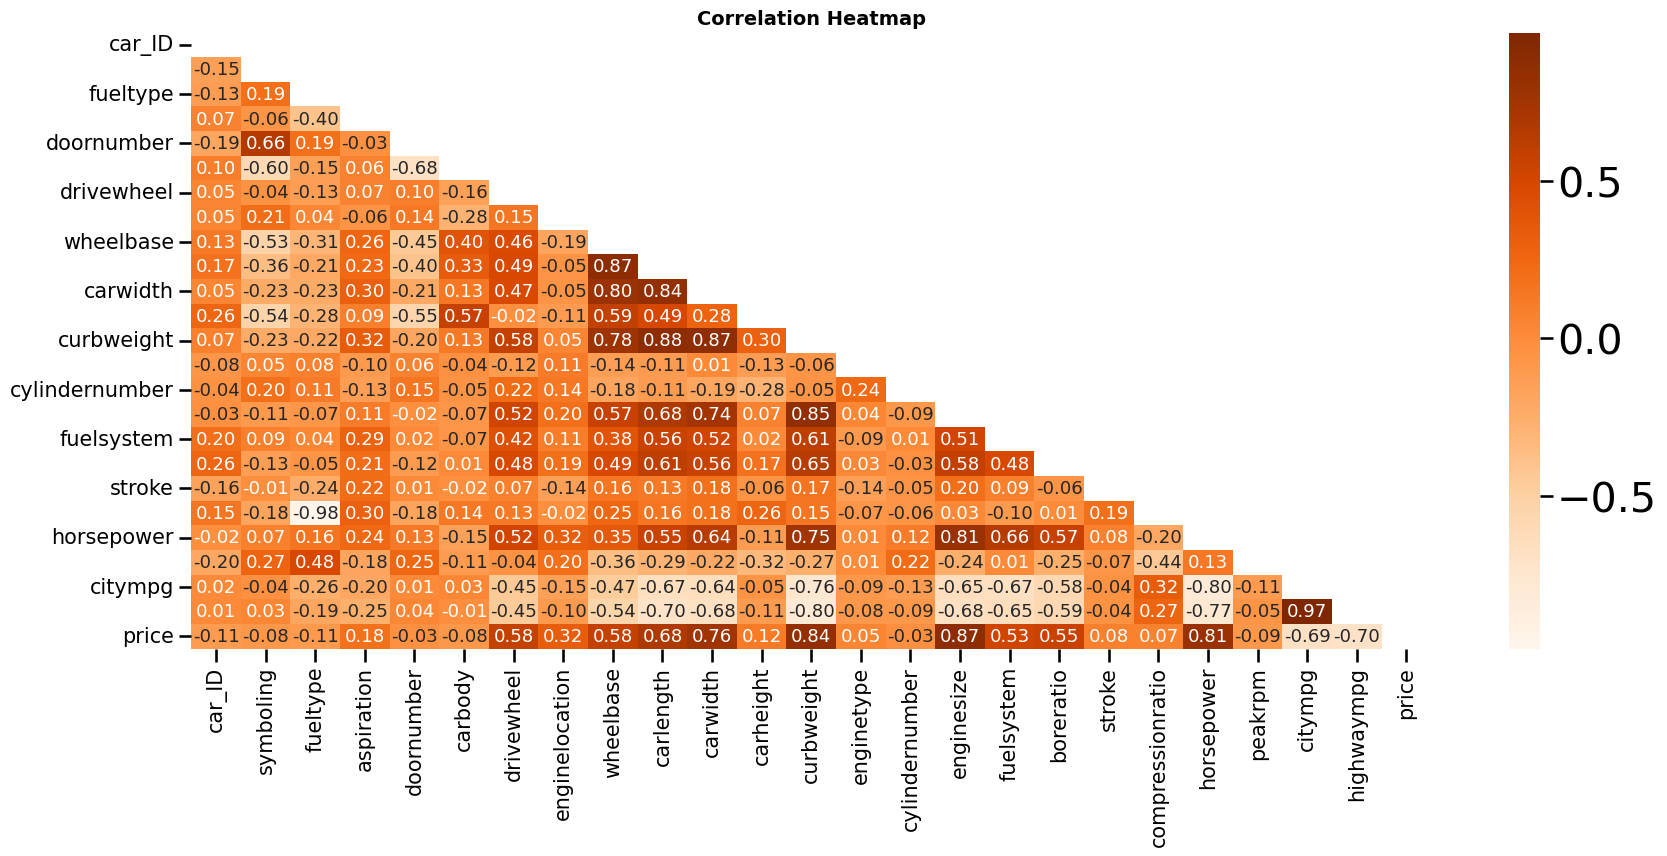

In [20]:
plot_correlation_heatmap(df, figsize=(20, 8), save_filename='c1.png', dpi=300)

The **correlation coefficient** is a number between -1 and 1 that indicates how strong and in what direction the relationship is between two variables.

- A correlation coefficient of 1 indicates a perfect positive correlation meaning that as the value of one variable increases, the value of the other variable also increases.
- A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as the value of one variable increases, the value of the other variable decreases.
- A correlation coefficient of 0 indicates no correlation between the two variables.

Here:
- 'highwaympg' and 'citympg' (0.97) and similarly all those which are greater than 0 are indicating positive correlation, which means that one increases as the other increases.
- 'fueltype' and 'compressionratio' (-0.98) and similarly all those which are lesser than 0 are indicating negative correlation, which means that one increases as the other decreases.

*It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other. A highly positive or negative correlation also doesn't imply multicollinearity, it depends more on the nature of the columns as well.*

##### Major Moments

In [21]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Calculate mean, median, skewness, and kurtosis for each numeric column
mean_values = df[numeric_columns].mean()
median_values = df[numeric_columns].median()
std_dev_values = df[numeric_columns].std()
skewness_values = df[numeric_columns].apply(lambda x: skew(x))
kurtosis_values = df[numeric_columns].apply(lambda x: kurtosis(x))

# Create a DataFrame to display statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Std Dev': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

# Print the statistics DataFrame with a nicely formatted table using tabulate
print("Statistics for each numeric column:")
print(tabulate(stats_df, headers='keys', tablefmt='psql'))  # 'psql' table format

Statistics for each numeric column:
+------------------+---------------+----------+-------------+------------+------------+
|                  |          Mean |   Median |     Std Dev |   Skewness |   Kurtosis |
|------------------+---------------+----------+-------------+------------+------------|
| car_ID           |   103         |   103    |   59.3226   |  0         | -1.20006   |
| symboling        |     0.834146  |     1    |    1.24531  |  0.209525  | -0.689015  |
| fueltype         |     0.902439  |     1    |    0.297446 | -2.71258   |  5.35811   |
| aspiration       |     0.180488  |     0    |    0.385535 |  1.66156   |  0.760779  |
| doornumber       |     0.439024  |     0    |    0.497483 |  0.245737  | -1.93961   |
| carbody          |     2.61463   |     3    |    0.859081 | -0.660423  |  0.97009   |
| drivewheel       |     1.32683   |     1    |    0.556171 | -0.0579244 | -0.689996  |
| enginelocation   |     0.0146341 |     0    |    0.120377 |  8.08382   | 63.3482  

**Skewness** is described as the asymmetry measure of the data distribution, whereas **Kurtosis** is described as tailedness or peakedness measure of the data distribution. The following code determines the skewness and kurtosis values of all the columns present in the dataset:

**For Skewness:**
- Skewness approximately equal to 0, the distribution is symmetric.
- Skewness is greater than 0, the distribution is right skewed.
- Skewness is lesser than 0, the distribution is left skewed.
- 'aspiration', 'enginelocation', 'wheelbase', 'cylindernumber', 'enginesize', 'compressionratio', 'horsepower', 'price' are strongly right skewed.
- 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'stroke' are moderate or weak left skewed.
- Others are moderate or weakly right skewed.

**For Kurtosis:**
- Kurtosis approximately equal to 3 indicates a normal distribution (mesokurtic).
- Kurtosis is greater than 3 indicates heavier tails and a sharper peak (leptokurtic).
- Kurtosis is lesser than 3 indicates lighter tails and a flatter peak (platykurtic).
- 'enginetype' is mesokurtic.
- 'fueltype', 'enginelocation', 'cylindernumber', 'enginesize', 'compressionratio' are leptokurtic.
- The rest of the columns are platykurtic.

##### Boxplots

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, plots_per_row=2, figsize=(20, 5), save_filename=None, dpi=300):
    """
    Plot box plots for the numeric columns in the DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - plots_per_row: Number of box plots to display per row (default: 2)
    - figsize: Tuple (width, height) specifying the figure size (default: (20, 5))
    - save_filename: Optional filename to save the plot as an image file (default: None)
    - dpi: Dots per inch (resolution) for the saved image file (default: 300)

    Returns:
    - None
    """
    # Filter numeric columns (excluding 'car_ID' and 'symboling')
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['car_ID', 'symboling'])

    # Select the last 6 numeric columns
    cols_to_plot = numeric_cols[-6:]

    # Calculate number of rows needed
    num_rows = (len(cols_to_plot) + plots_per_row - 1) // plots_per_row

    # Create subplots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(figsize[0], figsize[1]*num_rows))

    # Flatten axes array to handle multi-row layouts
    axes = axes.flatten()

    # Plot each selected numeric column as a box plot
    for i, col in enumerate(cols_to_plot):
        ax = axes[i]
        # Customize boxplot appearance
        box = sns.boxplot(x=df[col], ax=ax, color='yellow', flierprops=dict(marker='o', markersize=6, markerfacecolor='lightblue', markeredgecolor='black'))
        box.set_title(f'Box Plot of {col}', fontsize=18, fontweight='bold')
        box.set_ylabel('Values', fontsize=16, fontweight='bold')
        box.set_xlabel(col, fontsize=16, fontweight='bold')
        box.grid(True)

        # Set background color for the box plot
        ax.set_facecolor('whitesmoke')  # Adjust the background color as desired

    # Remove any empty subplot axes
    for j in range(len(cols_to_plot), num_rows * plots_per_row):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()

    # Save the plot if a filename is provided
    if save_filename is not None:
        plt.savefig(save_filename, dpi=dpi)

    # Show the plot
    plt.show()

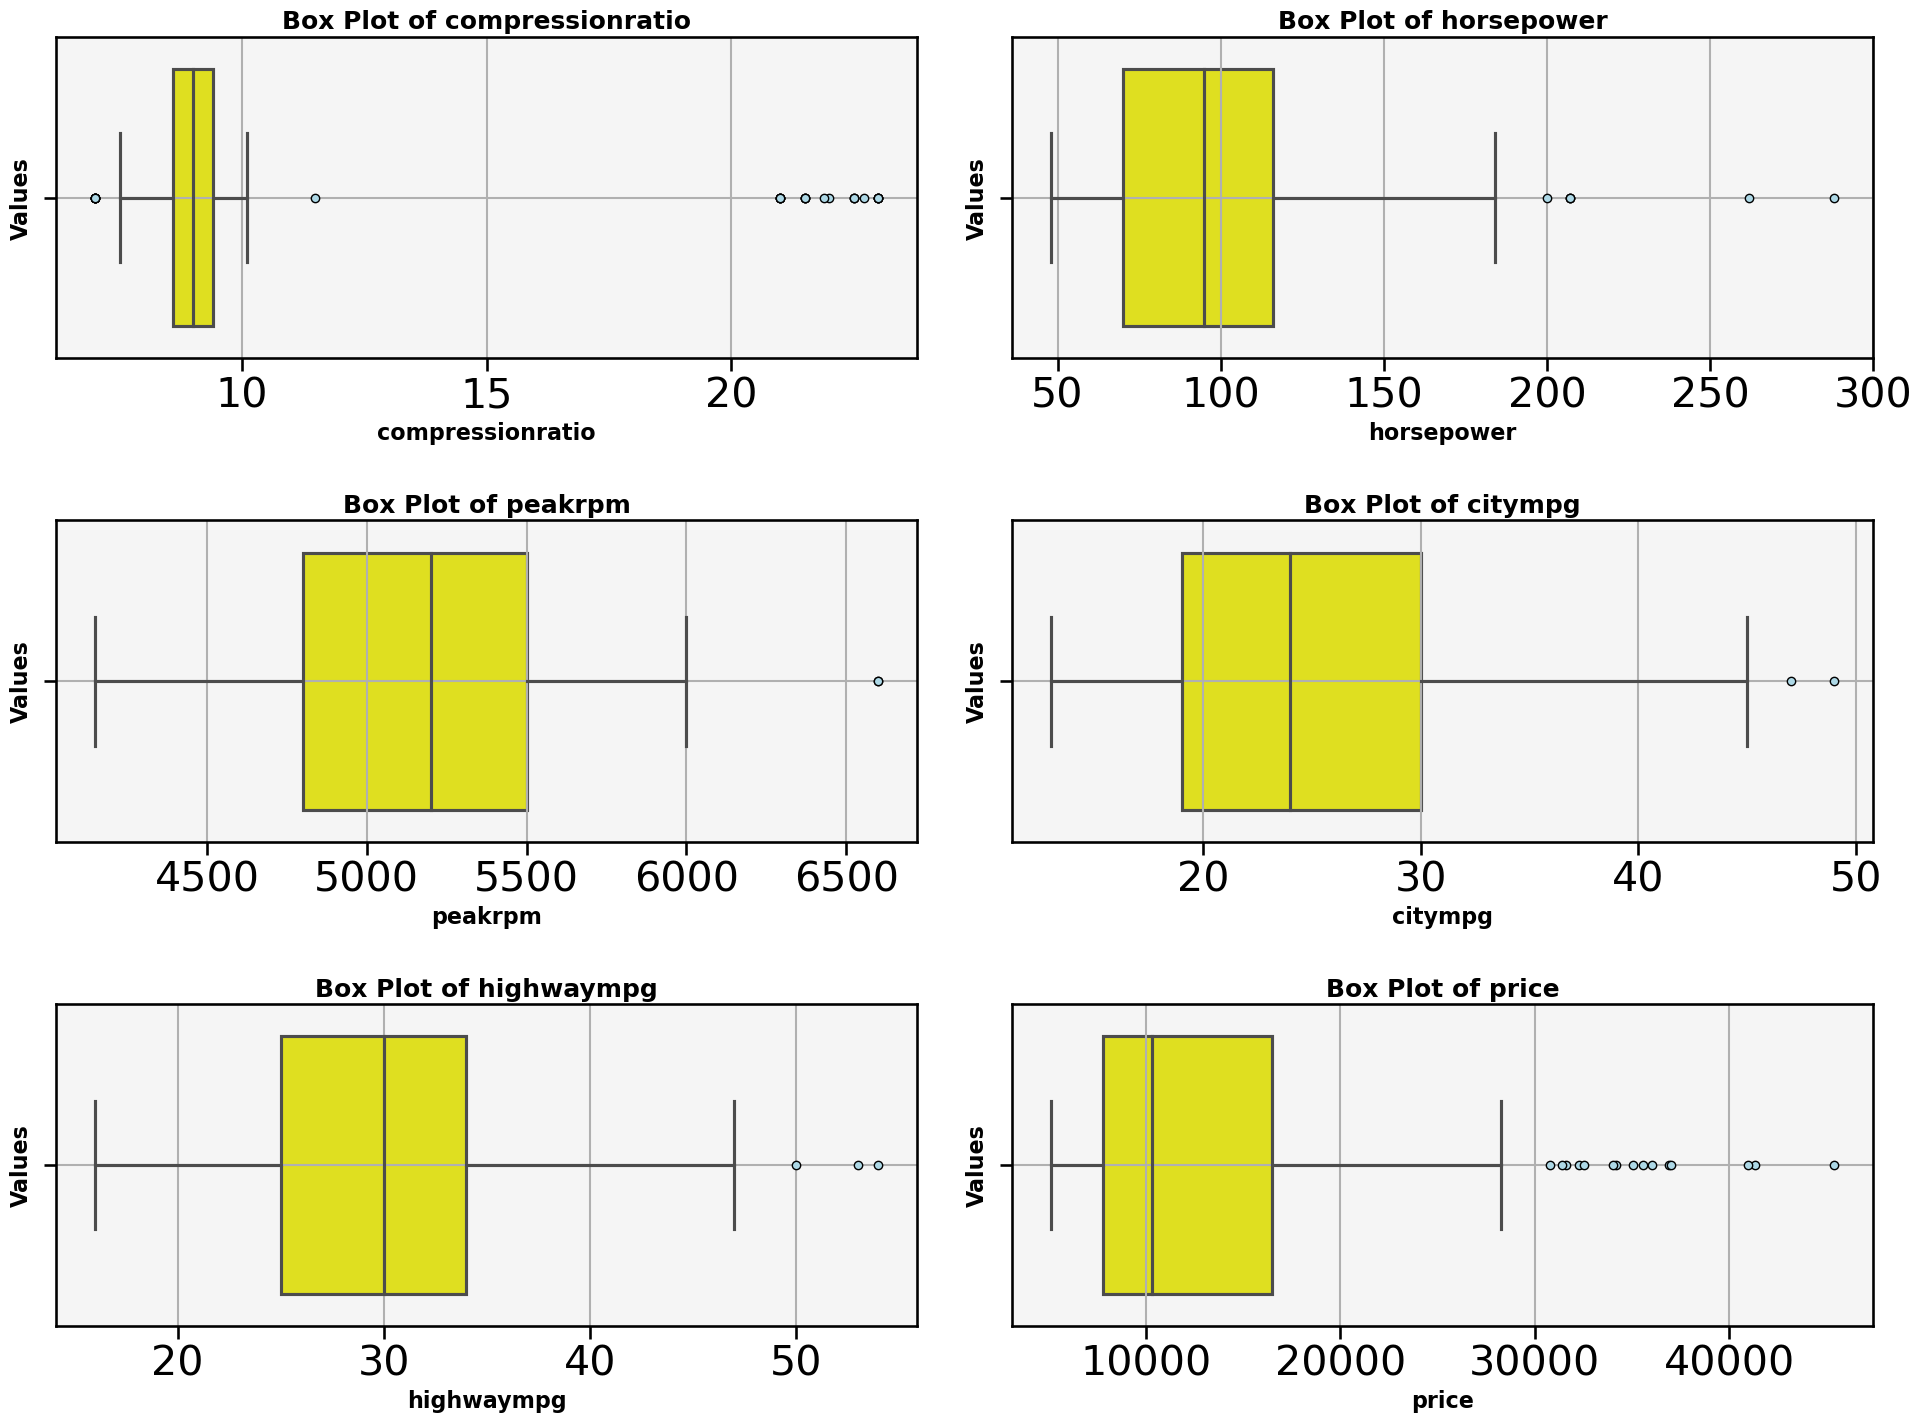

In [23]:
plot_boxplots(df, plots_per_row=2, figsize=(20, 5), save_filename='c11.png', dpi=300)

##### Scatterplot

In [24]:
def plot_scatter_with_hue(data, x_var, y_var, hue_var, figsize=(6, 4)):
    """
    Plot a scatter plot with hue using Seaborn.

    Parameters:
    - data: DataFrame containing the data
    - x_var: Column name for the x-axis variable
    - y_var: Column name for the y-axis variable
    - hue_var: Column name for the hue variable (used for coloring)
    - figsize: Tuple (width, height) specifying the figure size (default: (6, 4))
    """
    # Create a new figure with the specified size
    plt.figure(figsize=figsize)

    # Plot scatter plot with hue
    sns.scatterplot(data=data, x=x_var, y=y_var, hue=hue_var, palette='Set1', alpha=0.7)

    # Set plot title and labels
    plt.title(f'{y_var.capitalize()} vs. {x_var.capitalize()} with {hue_var.capitalize()}', fontsize=14, fontweight='bold')
    plt.xlabel(f'{x_var.capitalize()}', fontsize=12, fontweight='bold')
    plt.ylabel(f'{y_var.capitalize()}', fontsize=12, fontweight='bold')
    plt.grid(True)

    # Customize legend
    legend = plt.legend(title=f'{hue_var.capitalize()}', fontsize=8)  # Set legend font size
    legend.get_title().set_fontweight('bold')  # Bold legend title
    legend.get_title().set_fontsize(10)  # Set smaller font size for legend title

    # Customize tick labels for x-axis and y-axis
    plt.xticks(fontsize=8)  # Set smaller font size for x-axis tick labels
    plt.yticks(fontsize=8)  # Set smaller font size for y-axis tick labels

    # Show or save the plot
    plt.savefig('c3.png', dpi=300)  # Save the plot as an image file
    plt.show()  # Display the plot

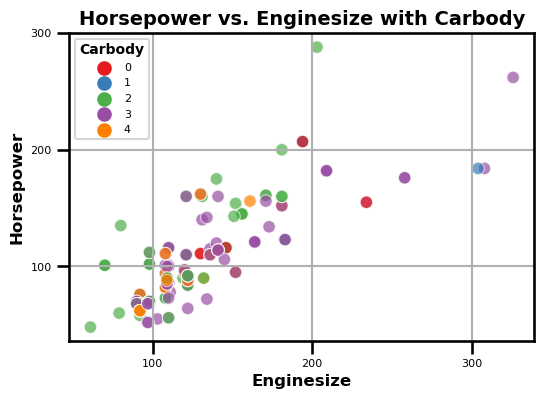

In [25]:
plot_scatter_with_hue(df, 'enginesize', 'horsepower', 'carbody', figsize=(6, 4))

##### Elbow Method for Optimal 'k'

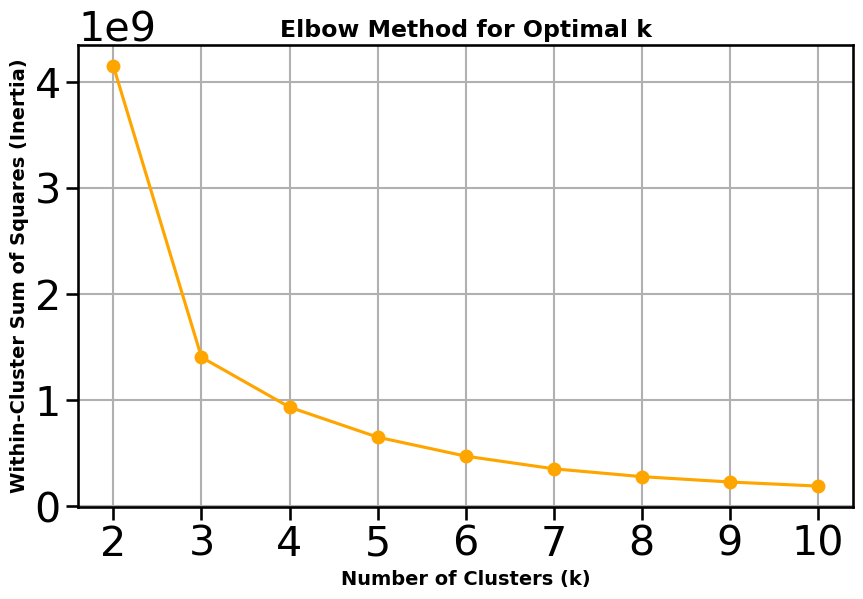

In [26]:
# Extract features for clustering (exclude the 'quality' column)
X = df.drop(['CarName','carbody'], axis=1)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('c5.png', dpi=300)
plt.show()

### Model Creation and Evaluation

##### Clustering

In [27]:
def perform_kmeans_clustering(data, x_col, y_col, n_clusters=3):
    """
    Perform K-means clustering on the specified data.

    Parameters:
    - data: DataFrame containing the data
    - x_col: Column name for the x-axis variable
    - y_col: Column name for the y-axis variable
    - n_clusters: Number of clusters to create (default: 3)

    Returns:
    - DataFrame: Original DataFrame with an additional 'cluster' column containing cluster labels
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    df = data.copy()

    # Perform K-means clustering
    km = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = km.fit_predict(df[[x_col, y_col]])

    return df,km

In [28]:
result_df , km = perform_kmeans_clustering(df, 'carlength', 'carheight', n_clusters=3)

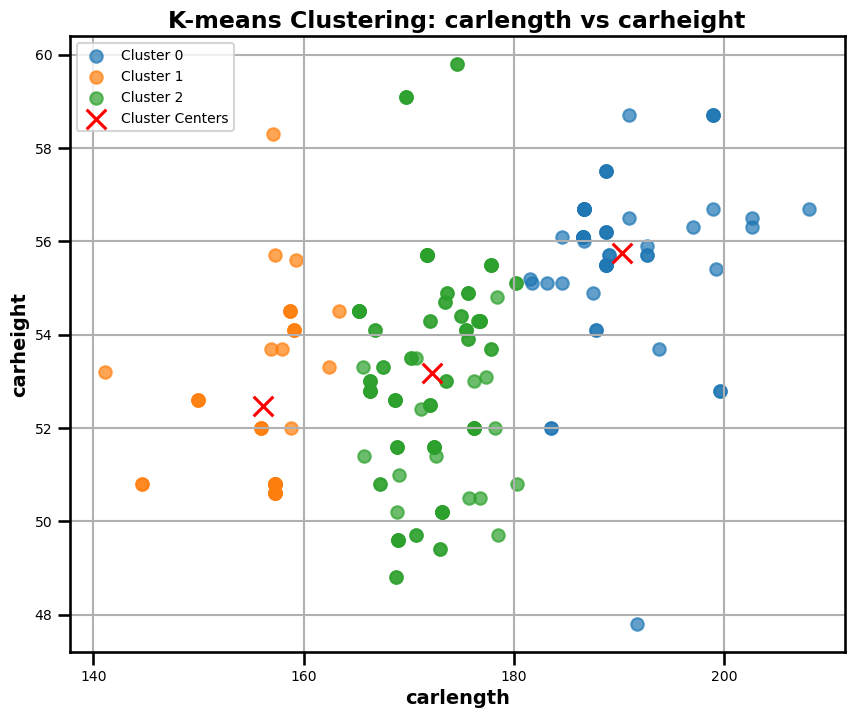

In [29]:
# Plot clusters with cluster centers using the result_df DataFrame
plt.figure(figsize=(10, 8))

# Plot each cluster using a different color
for cluster_label in sorted(result_df['cluster'].unique()):
    cluster_data = result_df[result_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['carlength'], cluster_data['carheight'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: carlength vs carheight', fontsize=17, fontweight='bold')
plt.xlabel('carlength', fontsize=14, fontweight='bold')
plt.ylabel('carheight', fontsize=14, fontweight='bold')

# Customize tick labels for x-axis and y-axis
plt.xticks(fontsize=10)  # Set smaller font size for x-axis tick labels
plt.yticks(fontsize=10)  # Set smaller font size for y-axis tick labels

# Add legend
plt.legend(fontsize=10)
plt.grid(True)

# Save the plot as an image file
plt.savefig('c6.png', dpi=300)
plt.show()

##### Checking the code if it predicts correctly

In [30]:
# Example new data point(s) for prediction
new_data = pd.DataFrame({'carlength': [155, 190], 'carheight': [54, 56]})

# Use the trained K-means model to predict cluster labels for the new data
predicted_clusters = km.predict(new_data)

# Display the predicted cluster labels for the new data points
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 1
Predicted Cluster for New Data Point 2: 0


##### Visualizing the Predictions

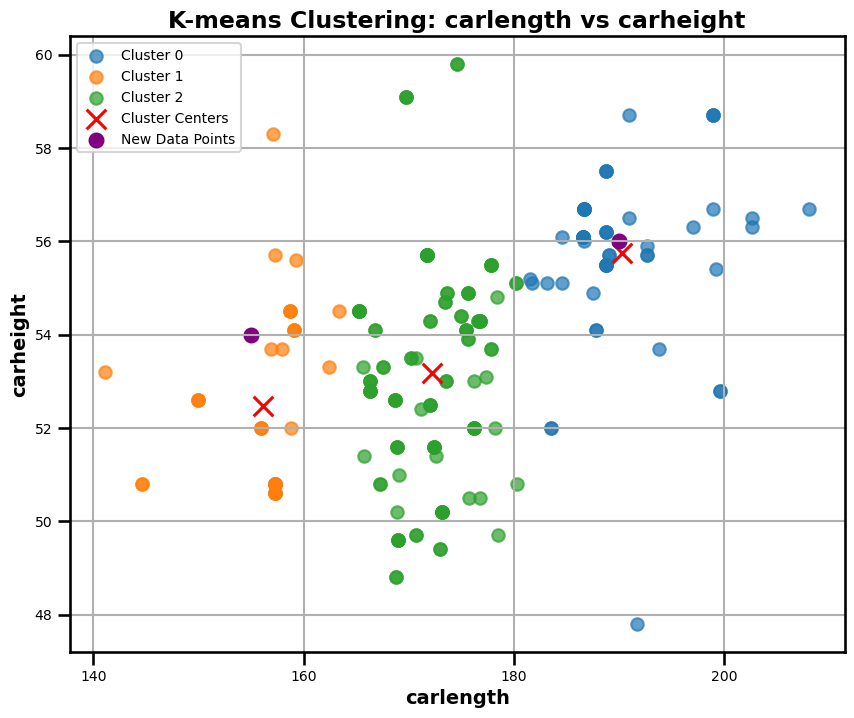

In [31]:
# Plot the new data points along with existing clusters and cluster centers
plt.figure(figsize=(10, 8))

# Plot each existing cluster using a different color
for cluster_label in sorted(result_df['cluster'].unique()):
    cluster_data = result_df[result_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['carlength'], cluster_data['carheight'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Plot the new data points with predicted cluster labels
plt.scatter(new_data['carlength'], new_data['carheight'], marker='o', s=100, c='purple', label='New Data Points')

# Set plot title and labels
plt.title('K-means Clustering: carlength vs carheight', fontsize=17, fontweight='bold')
plt.xlabel('carlength', fontsize=14, fontweight='bold')
plt.ylabel('carheight', fontsize=14, fontweight='bold')

# Customize tick labels for x-axis and y-axis
plt.xticks(fontsize=10)  # Set smaller font size for x-axis tick labels
plt.yticks(fontsize=10)  # Set smaller font size for y-axis tick labels

# Add legend
plt.legend(fontsize=10)
plt.grid(True)
plt.savefig('c8.png', dpi=300)
plt.show()

##### Fitting

In [32]:
def calculate_regression(df, test_size=0.2, random_state=42, confidence=0.95):
    """
    Perform linear regression, predict on test data, and calculate confidence intervals.

    Parameters:
    - X: DataFrame or array-like object containing features
    - y: Series or array-like object containing target variable
    - test_size: Proportion of the dataset to include in the test split (default: 0.2)
    - random_state: Random state for reproducibility (default: 42)
    - confidence: Confidence level for calculating the confidence interval (default: 0.95)

    Returns:
    - y_test: Actual target values from the test set
    - y_pred: Predicted target values on the test set
    - confidence_interval: Confidence interval for predictions
    """
    X = df.drop(['price','CarName'], axis=1)  # Features (all columns except 'quality')
    y = df['price']  # Target variable ('quality')
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate degrees of freedom and standard error of the estimate
    n = len(y_test)
    degrees_freedom = n - 2
    se = np.sqrt(np.sum((y_test - y_pred)**2) / degrees_freedom)

    # Calculate t-score for given confidence level
    t = np.abs(stats.t.ppf((1 - confidence) / 2, degrees_freedom))

    # Calculate confidence interval
    confidence_interval = t * se
    return y_test, y_pred, confidence_interval, model

In [33]:
y_test, y_pred, confidence_interval, model = calculate_regression(df)

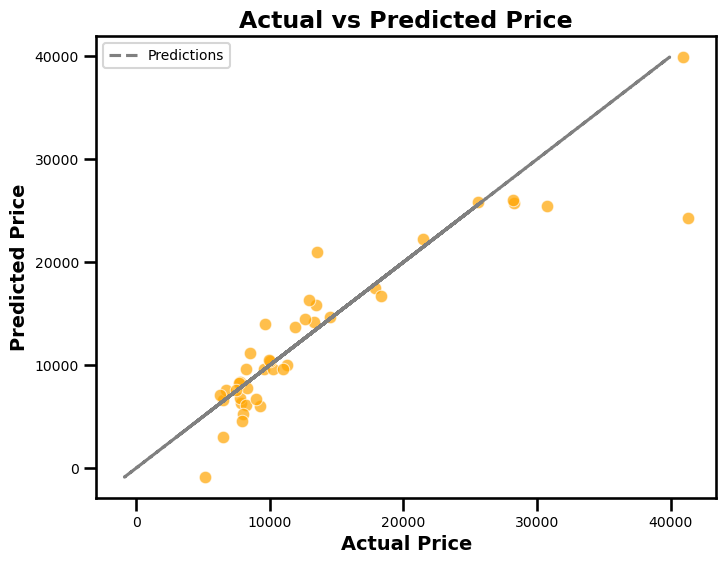

In [34]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='orange', alpha=0.7)
plt.plot(y_pred, y_pred, color='grey', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)  # Set smaller font size for x-axis tick labels
plt.yticks(fontsize=10)  # Set smaller font size for y-axis tick labels
plt.legend(fontsize=10)
plt.savefig('c7.png', dpi=300)
plt.show()

In [35]:
#Calculating the coefficients

coefficients = model.coef_
print(f'Coefficients {coefficients}')

#Calculating the intercept

intercept = model.intercept_
print(f'Intercept: {intercept}')

#Calculating R-Squared

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

#Calculating Root Mean Squared Error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Coefficients [-1.68532393e+01  1.47778535e+02  1.09955429e+04  1.09762972e+03
 -1.46021136e+03 -1.13995331e+03  9.00765491e+02  1.14610995e+04
  1.82235731e+02 -4.51761163e+01  5.62921157e+02  1.82331009e+02
  2.45342033e+00  3.31389097e+02 -4.08123141e+02  8.13922165e+01
  1.33581581e+02 -1.11805717e+03 -1.96688900e+03  9.44956408e+02
  1.82881326e+01  1.29347887e+00 -1.58580819e+02  5.97136966e+01]
Intercept: -73136.62725397453
R2: 0.8329598607197328
RMSE: 3631.366167585188
MAE 2223.3779125576716
Mean Squared Error: 13186820.243082335
